In [2]:
# preliminaries
import numpy as np
import os
import matplotlib.pyplot as plt
import sys  
sys.path.insert(0, r'C:\Users\payto\hubbleconst')
%matplotlib inline

import sncosmo # we'll use this to get SN distances
import snana # we'll use this to read supernova light curve files
from astropy.io import fits
import astropy.units as u
from astropy.table import Table
import gzip
import warnings
import get_vpec
import LC_CLASS
# let's get ready to measure distances relative to
# a cosmological model with H0=70, cosmic matter = 0.3
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(70,0.3)

In [27]:
from os import listdir
from os.path import isfile, join
path = 'research_payto/'
fileslist = [f for f in listdir(path) if isfile(join(path, f))]

In [28]:
fileslist

['CFA4_p1_2009Y.dat',
 'CSPDR2_2006D.dat',
 'CFA4_p2_2009le.dat.gz',
 'CFA3_4SHOOTER2_2002cr.DAT',
 'CSPDR2_2006bh.dat.gz',
 '1999dq.dat.gz',
 '1999cp.dat.gz',
 '1997bp.dat.gz',
 '2002dp.dat.gz',
 'Foundation_DR1_spec_PSNJ2043531.txt.gz',
 'CSPDR3_2006bh.DAT']

In [29]:
sns = []
for path in [fileslist[-1]]:
    file = os.path.expandvars('research_payto/'+ path)
    print(file)
    sn_ = snana.SuperNova(file)
    sns.append(sn_)
    
    #file = open('research/' + path).readlines
    #novae = os.path.expandvars(file()[0])
    #novae_data = novae.data

research_payto/CSPDR3_2006bh.DAT


In [30]:
#for i in range(len(sns)):
    #print(sns[i].FLUXCAL,sns[i].FLT)
#for flux,flt in zip(sn.FLUXCAL,sn.FLT):
    #print(flux,flt)
#for j,f in enumerate(sn.FLUXCAL):
    #print(sn.FLT[j],flux)

In [31]:
for key in sns[0].__dict__.keys():
    print(key,getattr(sns[0],key))

datfile /Users/David/Dropbox/research/hubbleconst/research_payto/CSPDR3_2006bh.DAT
SURVEY CSP
SNID 2006bh
FILTERS ugriBnmoJjYyH
RA 340.067083  # deg
DEC -66.485083  # deg
REDSHIFT_HELIO 0.0109 +- 0.0001  # Helio
REDSHIFT_FINAL 0.0106 +- 0.0001  # CMB
VPEC 118.6 +-  250.0  (+- 29.4 5sigma_sys) # km/s, from LH11 map
MWEBV 0.023 +-  0.004        # SFD98 * 0.86
PEAKMJD 53833.91                # at brightest obs
HOSTGAL_LOGMASS 10.53 +- 10.00  #
MJD [53832.92 53833.91 53835.93 53838.88 53841.92 53845.88 53846.88 53853.92
 53858.86 53861.87 53862.84 53866.84 53867.84 53870.85 53871.83 53872.82
 53891.79 53831.9  53832.92 53833.91 53838.88 53841.92 53845.88 53846.88
 53850.85 53853.92 53858.86 53861.87 53862.84 53866.84 53867.84 53870.85
 53871.83 53872.82 53891.79 53831.9  53832.92 53833.91 53838.88 53841.92
 53845.88 53846.88 53850.85 53853.92 53858.86 53861.87 53862.84 53866.84
 53867.84 53870.85 53871.83 53872.82 53891.79 53831.9  53832.92 53833.91
 53835.93 53838.88 53841.92 53845.88 538

2006bh
CSP ['wavelength (A)', 'CSP-u', 'CSP-g', 'CSP-r', 'CSP-i', 'CSP-B', 'CSP-V', 'CSP-o', 'CSP-m', 'CSP-n', 'CSP-Y', 'CSP-y', 'CSP-J', 'CSP-j', 'CSP-H', 'CSP-h']
B
H
J
Y
g
i
n
r
u
y


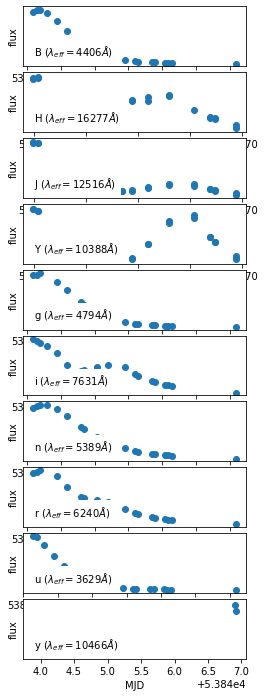

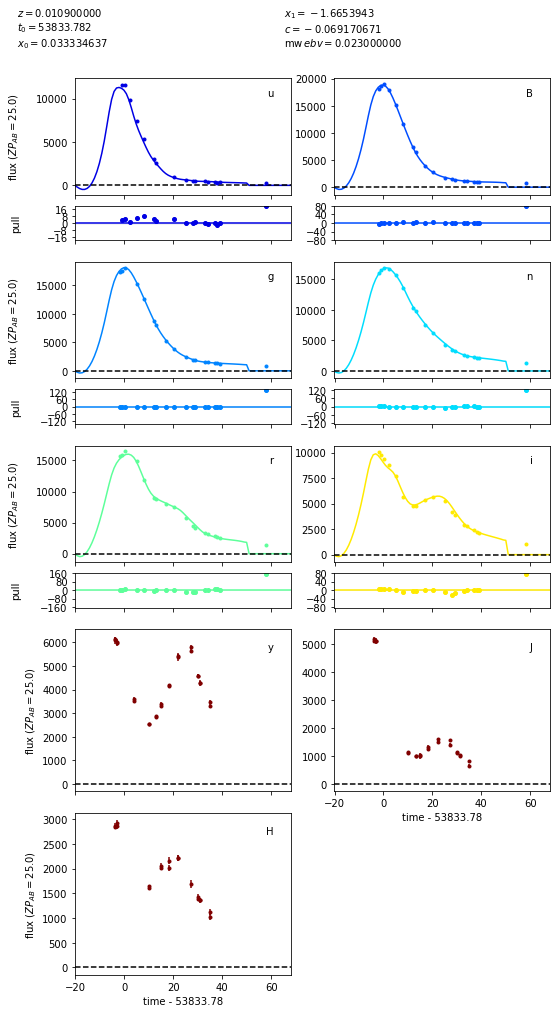

In [33]:
# dictionary mapping survey names to kcor files
def procedure(sn): 
    kcordict = {'CFA4p1':os.path.expandvars('$SNDATA_ROOT/kcor/PS1/Pantheon/kcor_PS1_LOWZ_COMBINED.fits.gz'),
                'CFA4p2':os.path.expandvars('$SNDATA_ROOT/kcor/SALT3TRAIN_K21/kcor_CFA4p2.fits'),
                'CSP':os.path.expandvars('$SNDATA_ROOT/kcor/CSP/CSPDR3/kcor_CSPDR3_BD17.fits.gz'),
                'CFA2':os.path.expandvars('$SNDATA_ROOT/kcor/SALT3TRAIN_K21/kcor_Jha2006.fits'),
                'LOWZ':os.path.expandvars('$SNDATA_ROOT/kcor/SALT3TRAIN_K21/kcor_Jha2006.fits'),
                'PS1_LOWZ_COMBINED':os.path.expandvars('$SNDATA_ROOT/kcor/PS1/Pantheon/kcor_PS1_LOWZ_COMBINED.fits'),
                'FOUNDATION':os.path.expandvars('$SNDATA_ROOT/kcor/SALT3TRAIN_K21/kcor_Foundation_DR1.fits'),
                'CFA3':os.path.expandvars('$SNDATA_ROOT/kcor/SALT3TRAIN_K21/kcor_Hicken2009.fits'),
                'CFA3_4SHOOTER':os.path.expandvars('$SNDATA_ROOT/kcor/CFA/CFA3/kcor_CFA3_4SHOOTER_BD17.fits')}
    SURVEY_KEY = sn.SURVEY.split('(')[0]
    if SURVEY_KEY not in kcordict:
        print(f'COULD NOT FIND {sn.SURVEY} IN kcordict USING KEY {SURVEY_KEY}')
        return
    kcorfile = kcordict[SURVEY_KEY]
    kcor = fits.open(kcorfile)
    #for i,k in enumerate(kcor):
        #if i==0:
            #continue
        #print(k.data.names)
    print(sn.SURVEY,kcor[5].data.names)
        # cosmetic things
    plt.rcParams['figure.figsize'] = (4,12)
    plt.subplots_adjust(hspace=0.1)

    # plot the SN "light curve" for each band
    for i,filt in enumerate(np.unique(sn.FLT)):
        # subplot for each filter
        ax = plt.subplot(len(np.unique(sn.FLT)),1,i+1)

        # fluxes and errors
        print(filt)
        ax.errorbar(sn.MJD[sn.FLT == filt],sn.FLUXCAL[sn.FLT == filt],yerr=sn.FLUXCALERR[sn.FLT == filt],fmt='o')

        # compute the effective wavelength so we know the "color" of each filter
        if filt not in kcor[5].data.names and len(filt) == 1:
            for name in kcor[5].data.names:
                if name[-1] == filt:
                    kcorfilt = name
        else:
            kcorfilt = filt
            
        lameff = np.sum(kcor[5].data[kcorfilt]*kcor[5].data['wavelength (A)'])/kcor[5].data[kcorfilt].sum()
        # using ax.text instead of title makes the spacing better
        ax.text(0.05,0.25,f"{filt} ($\lambda_{{eff}} = {lameff:.0f} \AA$)",ha='left',va='center',transform=ax.transAxes,bbox={'facecolor':'1.0','edgecolor':'1.0'})

        # cosmetic stuff
        ax.set_xlabel('MJD')
        ax.set_ylabel('flux')
        ax.set_yticks([]) # absolute flux doesn't matter for now
    plt.show()
    flc=LC_CLASS.LC()
    res = LC_CLASS.salt3_lc_fit(flc, sn.datfile, kcordict[SURVEY_KEY])
for sn in sns:
    print(sn.SNID)
    procedure(sn)